Dataset : "https://www.kaggle.com/datasets/lainguyn123/student-performance-factors/data"

Таблица предоставляет данные о различных факторах, которые оказывают влияние на результаты учащихся на экзаменах. Она включает сведения об учебных привычках, уровне посещаемости, участии родителей и других аспектах, влияющих на академическую успеваемость.

Цель: Используя данные из таблицы, необходимо решить задачу регрессии для параметра Exam_Score, основываясь на других переменных из набора данных.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from google.colab import files
uploaded = files.upload()
import io
df = pd.read_csv(io.BytesIO(uploaded['StudentPerformanceFactors.csv']))

Saving StudentPerformanceFactors.csv to StudentPerformanceFactors.csv


## Характеристики таблицы

In [2]:
df.shape

(6607, 20)

In [3]:
df.sample(10)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
3538,20,79,High,High,Yes,7,85,Low,Yes,2,Medium,Medium,Public,Neutral,2,No,College,Moderate,Male,69
5061,26,84,Medium,High,Yes,7,71,Medium,Yes,0,Medium,Medium,Public,Neutral,2,No,High School,Near,Female,70
2265,27,97,High,High,No,8,72,Medium,Yes,6,Low,Medium,Public,Neutral,2,No,College,Near,Female,76
5306,19,98,Medium,High,Yes,8,87,High,Yes,1,Medium,Medium,Private,Positive,4,No,Postgraduate,Moderate,Male,74
4435,24,68,Medium,High,Yes,9,92,Low,Yes,1,Low,High,Public,Positive,2,No,High School,Near,Male,67
5891,24,85,High,High,No,8,89,Medium,Yes,1,Low,Medium,Public,Neutral,3,No,High School,Moderate,Female,70
1274,27,72,Low,Low,Yes,7,79,Medium,Yes,2,High,High,Public,Positive,2,No,Postgraduate,Moderate,Female,68
342,21,70,Low,High,Yes,4,94,Medium,Yes,0,Low,High,Private,Neutral,2,No,College,Far,Male,65
6112,23,62,High,Medium,Yes,6,92,Low,Yes,0,High,Medium,Public,Neutral,2,No,NaN,Moderate,Male,65
2558,22,69,Medium,Medium,Yes,6,91,Low,Yes,0,High,High,Private,Neutral,1,Yes,High School,Moderate,Male,64


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

  ### Признаки :
  0. **Hours_Studied** - Количество часов, потраченных на учебу в неделю.
  1. **Attendance** -	Процент посещенных занятий.
  2. **Parental_Involvement** -	Уровень участия родителей в образовании ученика
(Low, Medium, High).
  3. **Access_to_Resources** - Доступ к обучающим ресурсам (Low, Medium, High).
  4. **Extracurricular_Activities**	- Участие во внеклассных мероприятиях (Yes, No).
  5. **Sleep_Hours** - Среднее количество часов сна за ночь.
  6. **Previous_Scores** - Результат предыдущего экзамена.
  7. **Motivation_Level**	- Мотивация (Low, Medium, High).
  8. **Internet_Access**	- Доступ к интернету (Yes, No).
  9. **Tutoring_Sessions** -	Количество посещенных занятий с репетиторами в месяц.
  10. **Family_Income**	- Финансовое состояние семьи (Low, Medium, High).
  11. **Teacher_Quality**	- Качество учителей (Low, Medium, High).
  12. **School_Type**	- Тип школы (Public, Private).
  13. **Peer_Influence**	- Влияние сверстников на успеваемость (Positive, Neutral, Negative).
  14. **Physical_Activity**	- Среднее количество часов физической активности в неделю.
  15. **Learning_Disabilities**	- Наличие проблем с обучением (Yes, No).
  16. **Parental_Education_Level** - Самый высокий уровень образования родителей (High School, College, Postgraduate).
  17. **Distance_from_Home** - Расстояние от дома до школы (Near, Moderate, Far).
  18. **Gender** - Гендер (Male, Female).
  19. **Exam_Score**	- Финальный результат экзамена.

# Обработка пропущенных значений

In [5]:
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [ ]:
df=df.dropna()
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [ ]:
df=df.drop_duplicates()
df.shape

(6378, 20)

# Мы удалили объекты, где хотя бы одно поле null , также удалили дупликаты. Всего удалили 229 объектов. Это составляет 3,5 % от всей выборки

# **Обработка категориальных признаков**

In [39]:

cat_columns = ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']
df[cat_columns] = df[cat_columns].astype('category')
df['Exam_Score'] = df['Exam_Score'].astype('int64')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Hours_Studied               6607 non-null   int64   
 1   Attendance                  6607 non-null   int64   
 2   Parental_Involvement        6607 non-null   category
 3   Access_to_Resources         6607 non-null   category
 4   Extracurricular_Activities  6607 non-null   category
 5   Sleep_Hours                 6607 non-null   int64   
 6   Previous_Scores             6607 non-null   int64   
 7   Motivation_Level            6607 non-null   category
 8   Internet_Access             6607 non-null   category
 9   Tutoring_Sessions           6607 non-null   int64   
 10  Family_Income               6607 non-null   category
 11  Teacher_Quality             6529 non-null   category
 12  School_Type                 6607 non-null   category
 13  Peer_Influence    

In [40]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [ ]:
df.describe(include=['category'])

,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Motivation_Level,Internet_Access,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
count,6607,6607,6607,6607,6607,6607,6529,6607,6607,6607,6517,6540,6607
unique,3,3,2,3,2,3,3,2,3,2,3,3,2
top,Medium,Medium,Yes,Medium,Yes,Low,Medium,Public,Positive,No,High School,Near,Male
freq,3362,3319,3938,3351,6108,2672,3925,4598,2638,5912,3223,3884,3814


# **Немного визуализации**

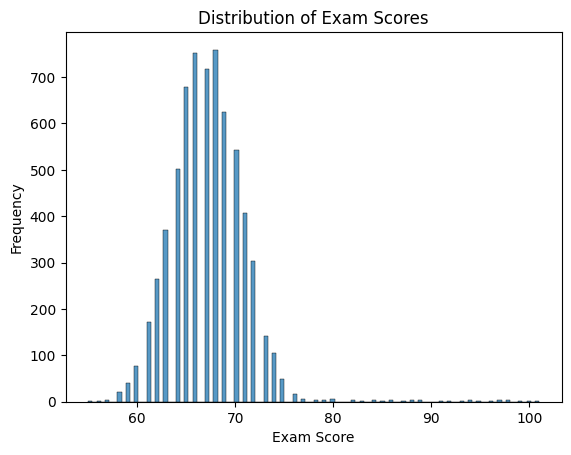

In [ ]:
sns.histplot(data=df, x='Exam_Score')

plt.title('Distribution of Exam Scores')

plt.xlabel('Exam Score')

plt.ylabel('Frequency')

plt.show()

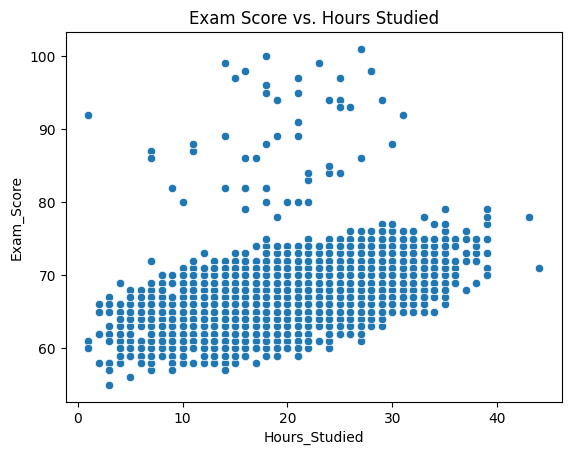

In [41]:
import matplotlib.pyplot as plt



sns.scatterplot(data=df, x='Hours_Studied', y='Exam_Score')

plt.title('Exam Score vs. Hours Studied')

plt.show()

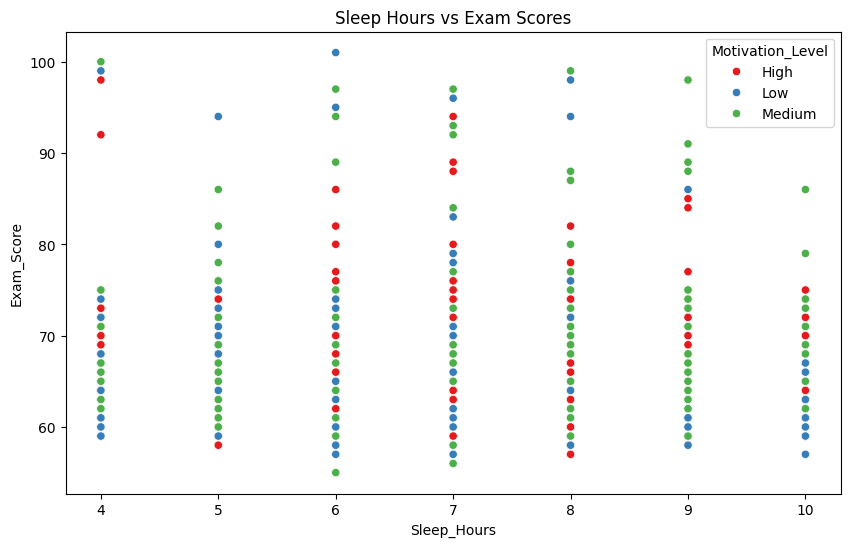

In [42]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sleep_Hours', y='Exam_Score', data=df, hue='Motivation_Level', palette='Set1')
plt.title('Sleep Hours vs Exam Scores')
plt.show()

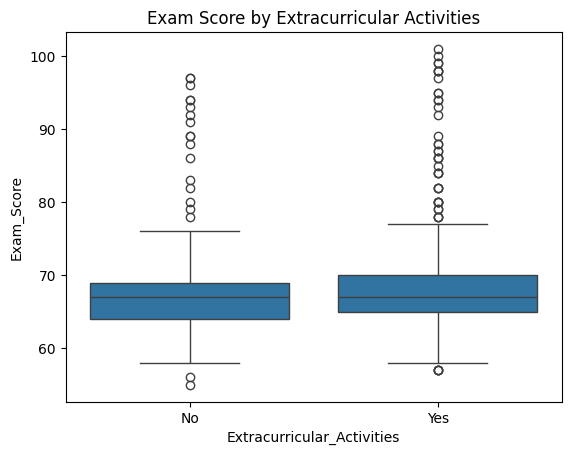

In [ ]:
import seaborn as sns

import matplotlib.pyplot as plt



sns.boxplot(data=df, x='Extracurricular_Activities', y='Exam_Score')

plt.title('Exam Score by Extracurricular Activities')

plt.show()

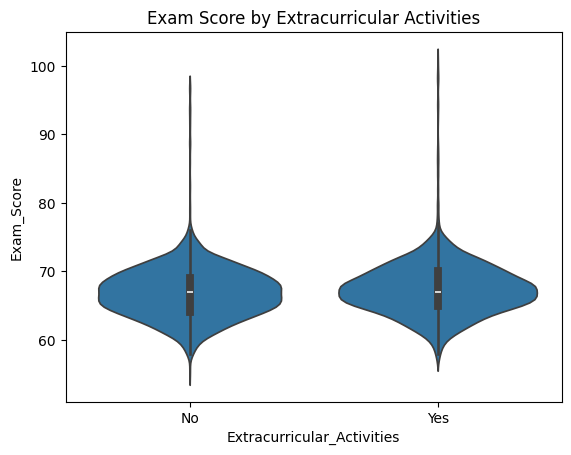

In [ ]:
import matplotlib.pyplot as plt



sns.violinplot(data=df, x='Extracurricular_Activities', y='Exam_Score')

plt.title('Exam Score by Extracurricular Activities')

plt.show()

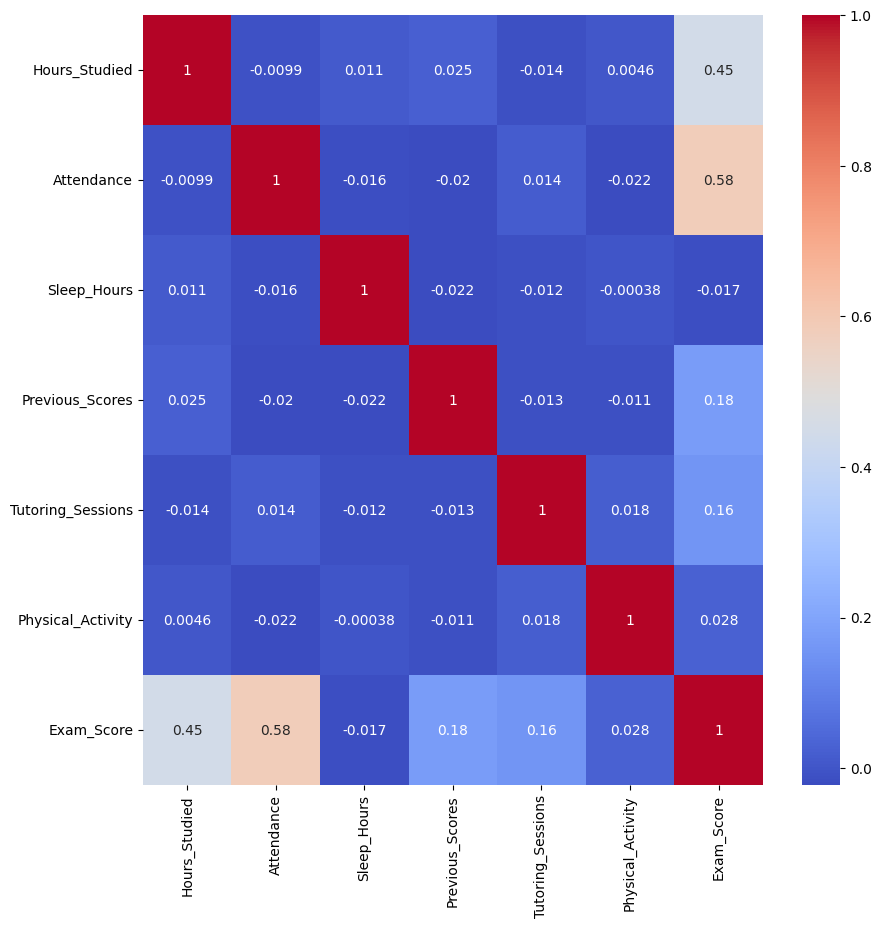

In [43]:
Correlation_Matrix=df.corr(numeric_only=True)
plt.figure(figsize=(10,10))
sns.heatmap(Correlation_Matrix,annot=True,cmap='coolwarm')
plt.show()

### **Подготовка и нормализация данных**

Произведем кодирование категориальных признаков

In [122]:
from sklearn.preprocessing import LabelEncoder
data = df.copy()
label_encoder = LabelEncoder()
needed_encoding = cat_columns = ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']
for i in needed_encoding:
    data[i]=label_encoder.fit_transform(data[i])
data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,0,0,7,73,1,1,0,1,2,1,2,3,0,1,2,1,67
1,19,64,1,2,0,8,59,1,1,2,2,2,1,0,4,0,0,1,0,61
2,24,98,2,2,1,7,91,2,1,2,2,2,1,1,4,0,2,2,1,74
3,29,89,1,2,1,8,98,2,1,1,2,2,1,0,4,0,1,1,1,71
4,19,92,2,2,1,6,65,2,1,3,2,0,1,1,4,0,0,2,0,70



Избавимся от некоторых столбцов в таблице

In [123]:
data = data.drop(['Access_to_Resources', 'School_Type','Extracurricular_Activities', 'Internet_Access', 'Peer_Influence', 'Learning_Disabilities', 'Distance_from_Home', 'Gender'], axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Hours_Studied             6607 non-null   int64
 1   Attendance                6607 non-null   int64
 2   Parental_Involvement      6607 non-null   int64
 3   Sleep_Hours               6607 non-null   int64
 4   Previous_Scores           6607 non-null   int64
 5   Motivation_Level          6607 non-null   int64
 6   Tutoring_Sessions         6607 non-null   int64
 7   Family_Income             6607 non-null   int64
 8   Teacher_Quality           6607 non-null   int64
 9   Physical_Activity         6607 non-null   int64
 10  Parental_Education_Level  6607 non-null   int64
 11  Exam_Score                6607 non-null   int64
dtypes: int64(12)
memory usage: 619.5 KB


In [124]:
data.head(5)

,Hours_Studied,Attendance,Parental_Involvement,Sleep_Hours,Previous_Scores,Motivation_Level,Tutoring_Sessions,Family_Income,Teacher_Quality,Physical_Activity,Parental_Education_Level,Exam_Score
0,23,84,1,7,73,1,0,1,2,3,1,67
1,19,64,1,8,59,1,2,2,2,4,0,61
2,24,98,2,7,91,2,2,2,2,4,2,74
3,29,89,1,8,98,2,1,2,2,4,1,71
4,19,92,2,6,65,2,3,2,0,4,0,70


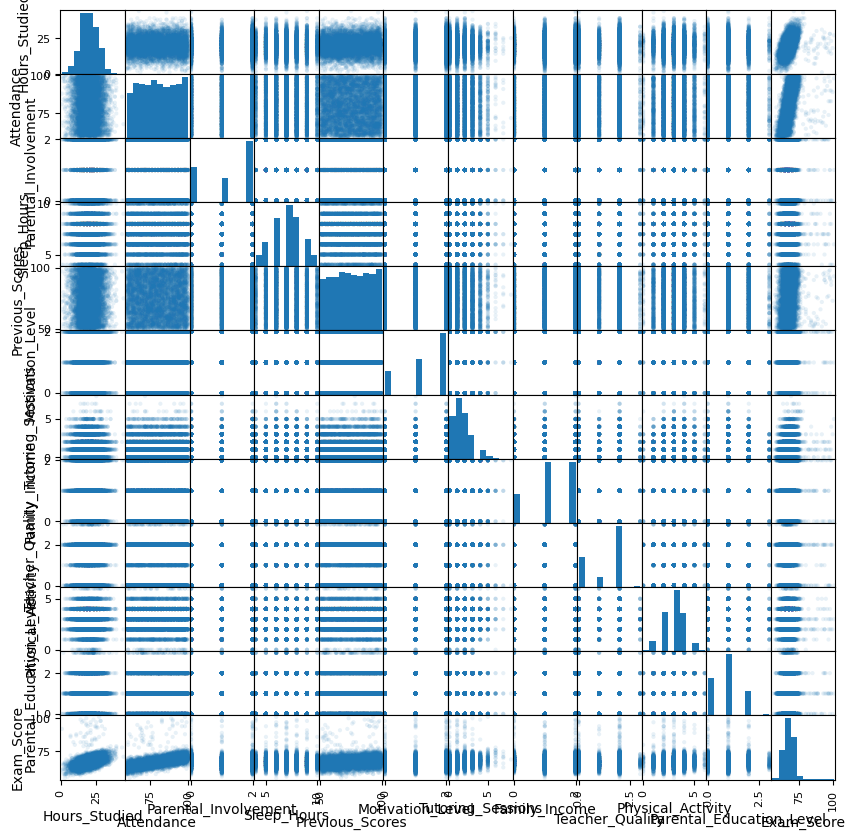

In [125]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = 0.1, figsize = (10, 10))
pass

**Разбиение данных на обучающую и тестовую выборки**

In [127]:
X=data.drop(columns = ['Exam_Score'])
y=data['Exam_Score']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

***Попробуем использовать RandomForestRegressor и посмотрим на его результаты***

In [131]:
from sklearn.ensemble import RandomForestRegressor

parameters = {'n_estimators': list(range(100, 401, 50)), 'max_depth': [4, 8], 'random_state': [42]}
rfr = RandomForestRegressor()
clf = GridSearchCV(rfr, parameters, verbose=2, cv=4)
clf.fit(X_train, y_train)
clf.best_params_

Fitting 4 folds for each of 14 candidates, totalling 56 fits
[CV] END .....max_depth=4, n_estimators=100, random_state=42; total time=   0.4s
[CV] END .....max_depth=4, n_estimators=100, random_state=42; total time=   0.4s
[CV] END .....max_depth=4, n_estimators=100, random_state=42; total time=   0.6s
[CV] END .....max_depth=4, n_estimators=100, random_state=42; total time=   0.7s
[CV] END .....max_depth=4, n_estimators=150, random_state=42; total time=   1.0s
[CV] END .....max_depth=4, n_estimators=150, random_state=42; total time=   1.0s
[CV] END .....max_depth=4, n_estimators=150, random_state=42; total time=   0.8s
[CV] END .....max_depth=4, n_estimators=150, random_state=42; total time=   0.7s
[CV] END .....max_depth=4, n_estimators=200, random_state=42; total time=   0.9s
[CV] END .....max_depth=4, n_estimators=200, random_state=42; total time=   0.9s
[CV] END .....max_depth=4, n_estimators=200, random_state=42; total time=   0.9s
[CV] END .....max_depth=4, n_estimators=200, ran

{'max_depth': 8, 'n_estimators': 400, 'random_state': 42}

**Выведем значения ошибок**

In [132]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, max_error, median_absolute_error, r2_score, explained_variance_score

def regression_report(y_true, y_pred):

    error = y_true - y_pred
    percentil = [5,25,50,75,95]
    percentil_value = np.percentile(error, percentil)

    metrics = [
        ('mean absolute error', mean_absolute_error(y_true, y_pred)),
        ('median absolute error', median_absolute_error(y_true, y_pred)),
        ('mean squared error', mean_squared_error(y_true, y_pred)),
        ('max error', max_error(y_true, y_pred)),
        ('r2 score', r2_score(y_true, y_pred)),
        ('explained variance score', explained_variance_score(y_true, y_pred))
    ]

    print('Metrics for regression:')
    for metric_name, metric_value in metrics:
        print(f'{metric_name:>25s}: {metric_value: >20.3f}')

    print('\nPercentiles:')
    for p, pv in zip(percentil, percentil_value):
        print(f'{p: 25d}: {pv:>20.3f}')

y_pred = clf.predict(X_test)
regression_report(y_test, y_pred)

Metrics for regression:
      mean absolute error:                1.332
    median absolute error:                1.014
       mean squared error:                5.440
                max error:               26.308
                 r2 score:                0.615
 explained variance score:                0.615

Percentiles:
                        5:               -2.774
                       25:               -1.099
                       50:               -0.081
                       75:                0.899
                       95:                2.192


Будем использовать **KNeighborsRegressor** алгоритм. Протестируем разные гиперпараметры и найдем самый оптимальный

In [135]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
parameters = {'n_neighbors': list(range(3, 51))}
knr = KNeighborsRegressor()
clf = GridSearchCV(knr, parameters, verbose=2, cv=4)
clf.fit(X_train, y_train)

Fitting 4 folds for each of 48 candidates, totalling 192 fits
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=4; total time=   0.0s
[CV] END ......................................n_neighbors=4; total time=   0.0s
[CV] END ......................................n_neighbors=4; total time=   0.0s
[CV] END ......................................n_neighbors=4; total time=   0.0s
[CV] END ......................................n_neighbors=5; total time=   0.0s
[CV] END ......................................n_neighbors=5; total time=   0.0s
[CV] END ......................................n_neighbors=5; total time=   0.0s
[CV] END ......................................

GridSearchCV(cv=4, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                         24, 25, 26, 27, 28, 29, 30, 31, 32, ...]},
             verbose=2)

*Наилучшее значения достигаются при n_neighbors = 31*

In [129]:
clf.best_params_

{'n_neighbors': 31}

In [130]:
y_pred = clf.predict(X_test)
regression_report(y_test, y_pred)

Metrics for regression:
      mean absolute error:                1.394
    median absolute error:                1.065
       mean squared error:                5.499
                max error:               26.194
                 r2 score:                0.611
 explained variance score:                0.612

Percentiles:
                        5:               -2.710
                       25:               -1.065
                       50:                0.016
                       75:                1.089
                       95:                2.613


#### Метод KNeighborsRegressor работает чуточку лучше чем метод RandomForestRegressor
### Немного визуализации по предсказанным значениям :

In [136]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

y_pred = clf.predict(X_test)

X_test

sc_list = {}
for col in data.columns:
    sc = StandardScaler()
    data[col] = sc.fit_transform(data[[col]])
    sc_list[col] = sc

# y_test.values.reshape(-1, 1)
y_test_sc = sc_list['Exam_Score'].inverse_transform(y_test.values.reshape(-1, 1))
y_pred_sc = sc_list['Exam_Score'].inverse_transform(y_pred.reshape(-1, 1))

df_res = pd.DataFrame({'pred': y_pred_sc.reshape(1, -1)[0], 'true': y_test_sc.reshape(1, -1)[0]})
df_res

,pred,true
0,66.838710,65.0
1,67.064516,65.0
2,69.354839,71.0
3,67.806452,64.0
4,64.774194,66.0
...,...,...
1317,67.193548,69.0
1318,71.935484,72.0
1319,65.161290,66.0
1320,65.548387,63.0


<Axes: xlabel='pred', ylabel='true'>

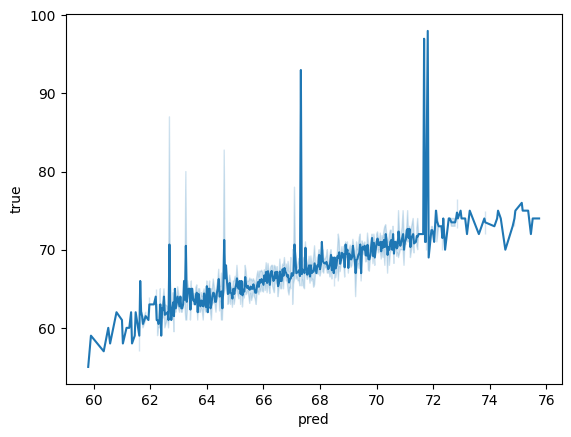

In [137]:
sns.lineplot(df_res, x='pred', y='true')

## Вывод : метод KNeighborsRegressor работает лучше чем метод RandomForestRegressor, но не значительно. Предсказания по методу KNeighborsRegressor являются неплохими, потому что средняя ошибка предсказания около 1 балла за экзамен, что достаточно мало. Однако случаются моменты, когда разница между предсказанием и оригинальной величиной достаточно высока, но такие ситуации встречаются крайне редко

# **Задача Кластеризации**

*С теми же данными - решить задачу кластеризации 3 методами: KMeans, DBSCAN и любым другим на ваш выбор. В задаче обучения с учителем вы не должны использовать целевую метку y. В случае задачи классификации сравнить выход каждого алгоритма кластеризации с истинными метками. Сделать выводы.*

In [107]:
from sklearn.cluster import KMeans, DBSCAN, MiniBatchKMeans
from sklearn.metrics import make_scorer

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

## **MiniBatchKMeans**

In [175]:
parameters = {'n_clusters': list(range(3, 21))}
mkm = MiniBatchKMeans()
clf = GridSearchCV(mkm, parameters, verbose=2, cv=3)
clf.fit(X)
print(f"Best params = {clf.best_params_}")

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] END .......................................n_clusters=3; total time=   0.0s
[CV] END .......................................n_clusters=3; total time=   0.0s
[CV] END .......................................n_clusters=3; total time=   0.0s
[CV] END .......................................n_clusters=4; total time=   0.0s
[CV] END .......................................n_clusters=4; total time=   0.0s
[CV] END .......................................n_clusters=4; total time=   0.0s
[CV] END .......................................n_clusters=5; total time=   0.0s
[CV] END .......................................n_clusters=5; total time=   0.0s
[CV] END .......................................n_clusters=5; total time=   0.0s
[CV] END .......................................n_clusters=6; total time=   0.0s
[CV] END .......................................n_clusters=6; total time=   0.0s
[CV] END .......................................

In [178]:
# validation
X_val = X.copy()
mkm = MiniBatchKMeans(n_clusters=20)
labels = mkm.fit_predict(X_val)
X_val['labels'] = labels

mkm_std = []
for label in set(labels):
    prices = sc_list['Exam_Score'].inverse_transform(y[X_val['labels'] == label].values.reshape(-1, 1))
    mkm_std.append(prices.std())
    print(f'В классе {label} std = {round(prices.std(), 2)}')

print(f'Средняя внутренняя дисперсия по кластерам: {round(sum(mkm_std) / len(mkm_std), 2)}')

В классе 0 std = 2.45
В классе 1 std = 3.28
В классе 2 std = 2.59
В классе 3 std = 3.05
В классе 4 std = 3.6
В классе 5 std = 3.29
В классе 6 std = 2.07
В классе 7 std = 2.35
В классе 8 std = 2.67
В классе 9 std = 3.22
В классе 10 std = 2.99
В классе 11 std = 2.97
В классе 12 std = 2.52
В классе 13 std = 3.51
В классе 14 std = 2.94
В классе 15 std = 3.0
В классе 16 std = 2.63
В классе 17 std = 2.04
В классе 18 std = 3.69
В классе 19 std = 2.77
Средняя внутренняя дисперсия по кластерам: 2.88


## **DBSCAN**

In [188]:
def cmp(y_pred, y_true):
    return np.sum(y_pred == y_true)

parameters = {
    'eps': np.linspace(2.8, 4.0, 30),  # Диапазон значений eps
}
dbscan = DBSCAN()
clf = GridSearchCV(dbscan, parameters, verbose=2, cv=4, scoring=make_scorer(cmp))
clf.fit(X)

Fitting 4 folds for each of 30 candidates, totalling 120 fits
[CV] END ............................................eps=2.8; total time=   0.1s
[CV] END ............................................eps=2.8; total time=   0.1s
[CV] END ............................................eps=2.8; total time=   0.1s
[CV] END ............................................eps=2.8; total time=   0.1s
[CV] END .............................eps=2.8413793103448275; total time=   0.1s
[CV] END .............................eps=2.8413793103448275; total time=   0.1s
[CV] END .............................eps=2.8413793103448275; total time=   0.1s
[CV] END .............................eps=2.8413793103448275; total time=   0.1s
[CV] END ..............................eps=2.882758620689655; total time=   0.1s
[CV] END ..............................eps=2.882758620689655; total time=   0.1s
[CV] END ..............................eps=2.882758620689655; total time=   0.1s
[CV] END ..............................eps=2.88

GridSearchCV(cv=4, estimator=DBSCAN(),
             param_grid={'eps': array([2.8       , 2.84137931, 2.88275862, 2.92413793, 2.96551724,
       3.00689655, 3.04827586, 3.08965517, 3.13103448, 3.17241379,
       3.2137931 , 3.25517241, 3.29655172, 3.33793103, 3.37931034,
       3.42068966, 3.46206897, 3.50344828, 3.54482759, 3.5862069 ,
       3.62758621, 3.66896552, 3.71034483, 3.75172414, 3.79310345,
       3.83448276, 3.87586207, 3.91724138, 3.95862069, 4.        ])},
             scoring=make_scorer(cmp, response_method='predict'), verbose=2)

In [189]:
clf.best_params_

{'eps': 2.8}

In [199]:
# validation
X_val = X.copy()
dbscan = DBSCAN(eps=2.8)
labels = dbscan.fit_predict(X_val)
X_val['labels'] = labels

dbscan_std = []
for label in set(labels):
    prices = sc_list['Exam_Score'].inverse_transform(y[X_val['labels'] == label].values.reshape(-1, 1))
    dbscan_std.append(prices.std())
    print(f'В классе {label} std = {round(prices.std(), 2)}')

print(f'Средняя внутренняя дисперсия по кластерам: {round(sum(dbscan_std) / len(dbscan_std), 2)}')

В классе 0 std = 0.86
В классе 1 std = 0.8
В классе 2 std = 1.55
В классе 3 std = 0.94
В классе 4 std = 0.49
В классе 5 std = 1.02
В классе 6 std = 0.75
В классе 7 std = 1.79
В классе 8 std = 1.17
В классе 9 std = 1.4
В классе 10 std = 1.5
В классе 11 std = 1.36
В классе 12 std = 1.8
В классе 13 std = 0.75
В классе 14 std = 1.25
В классе -1 std = 3.9
Средняя внутренняя дисперсия по кластерам: 1.33


## **KMeans**

In [182]:
parameters = {'n_clusters': list(range(3, 21))}
km = KMeans()
clf = GridSearchCV(km, parameters, verbose=2, cv=3)
clf.fit(X)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] END .......................................n_clusters=3; total time=   0.0s
[CV] END .......................................n_clusters=3; total time=   0.0s
[CV] END .......................................n_clusters=3; total time=   0.0s
[CV] END .......................................n_clusters=4; total time=   0.0s
[CV] END .......................................n_clusters=4; total time=   0.0s
[CV] END .......................................n_clusters=4; total time=   0.0s
[CV] END .......................................n_clusters=5; total time=   0.0s
[CV] END .......................................n_clusters=5; total time=   0.0s
[CV] END .......................................n_clusters=5; total time=   0.0s
[CV] END .......................................n_clusters=6; total time=   0.0s
[CV] END .......................................n_clusters=6; total time=   0.0s
[CV] END .......................................

GridSearchCV(cv=3, estimator=KMeans(),
             param_grid={'n_clusters': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                        15, 16, 17, 18, 19, 20]},
             verbose=2)

In [183]:
clf.best_params_

{'n_clusters': 20}

In [184]:
# validation
X_val = X.copy()
km = KMeans(n_clusters=20)
labels = km.fit_predict(X_val)
X_val['labels'] = labels

km_std = []
for label in set(labels):
    prices = sc_list['Exam_Score'].inverse_transform(y[X_val['labels'] == label].values.reshape(-1, 1))
    km_std.append(prices.std())
    print(f'В классе {label} std = {round(prices.std(), 2)}')

print(f'Средняя внутренняя дисперсия по кластерам: {round(sum(km_std) / len(km_std), 2)}')

В классе 0 std = 2.56
В классе 1 std = 1.9
В классе 2 std = 3.54
В классе 3 std = 3.85
В классе 4 std = 2.58
В классе 5 std = 2.87
В классе 6 std = 2.8
В классе 7 std = 3.05
В классе 8 std = 3.71
В классе 9 std = 3.59
В классе 10 std = 2.61
В классе 11 std = 3.42
В классе 12 std = 2.58
В классе 13 std = 3.08
В классе 14 std = 3.25
В классе 15 std = 2.16
В классе 16 std = 2.36
В классе 17 std = 2.09
В классе 18 std = 2.63
В классе 19 std = 2.59
Средняя внутренняя дисперсия по кластерам: 2.86


### Выводы: По результатам проведенных экспериментов наиболее эффективным оказался алгоритм DBSCAN, который показал среднюю внутривидовую дисперсию на уровне 1.33 единицы. Алгоритмы KMeans и MiniBatchKMeans продемонстрировали результаты, более чем в два раза уступающие DBSCAN. Тем не менее, предполагается, что более высоких показателей можно достичь, применяя методы обучения с учителем.